In [1]:
#Packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

'''this command is for making plots in Jupyter Notebooks or IPython environments to plot them directly in cells rather 
opening a seperate window ''' 
%matplotlib inline 


import sklearn 

import librosa
import librosa.display
import IPython.display as ipd 
import os 


In [2]:
general_path='Data/' #let's say your file is in some other folder so this variable will make it easier to get the genral path of the files 

print(list(os.listdir(f'{general_path}/genres_original'))) #This shows all the files or folder in a particular directory 

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


#let's start with getting different datas such as spectogram mel spec , ftf, stft, 2d representation ,mfcc , trimminhg 
etc

In [3]:
y,sr=librosa.load(f'{general_path}/genres_original/country/country.00000.wav')

In [4]:
print('y:', y)
print('y shape: ', np.shape(y))
print('sample rate (in KHz): ',sr) # sample rate is the number of samples of audio per second in Hz or Khz 
print('check len of audio :' ,y.shape[0]/sr)# returns length of the audio we gave 

y: [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892]
y shape:  (663300,)
sample rate (in KHz):  22050
check len of audio : 30.081632653061224


#trimming the audio i.e as we know there are several stop in songs that we might not need in our data so we will trim it before or after the audio 

In [5]:
audio_file,_=librosa.effects.trim(y)

print('Audio_file shape : ', np.shape(audio_file))

Audio_file shape :  (663300,)


2D representation of the sound 

Text(0.5, 1.0, 'Sound wave in country music ')

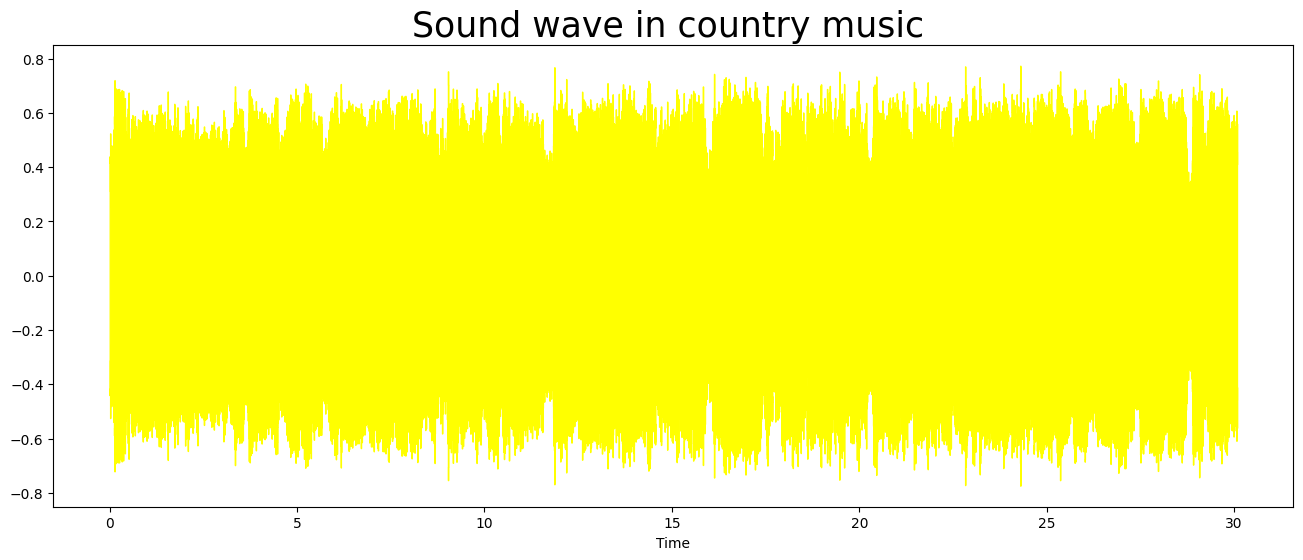

In [6]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=audio_file,sr=sr,color='yellow')
plt.title("Sound wave in country music ",fontsize=25)

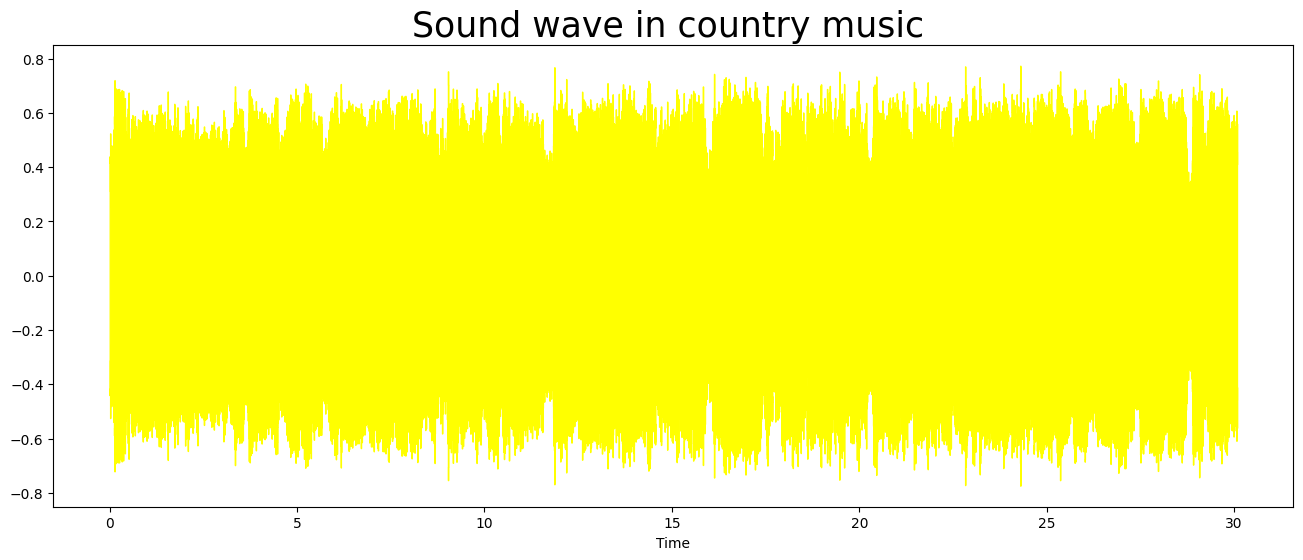

In [7]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=audio_file,sr=sr,color='yellow')
plt.title("Sound wave in country music ",fontsize=25); #addding colon will remove this
#Text(0.5, 1.0, 'Sound wave in country music ') liine from above output 


Fourier Transform 

** It is a function that gets a signal in time domain as input and outputs its decomposition into frequencies 

In [8]:
n_fft=2048 #FFT window size 
hop_length=512 #The number of samples between the starting point of one frame and the starting point of the next frame

#Short Time Fourier transorm (STFT) 
D=np.abs(librosa.stft(audio_file,n_fft=n_fft,hop_length=hop_length))
print(f'Shape of D object {np.shape(D)}')


Shape of D object (1025, 1296)


 ...]

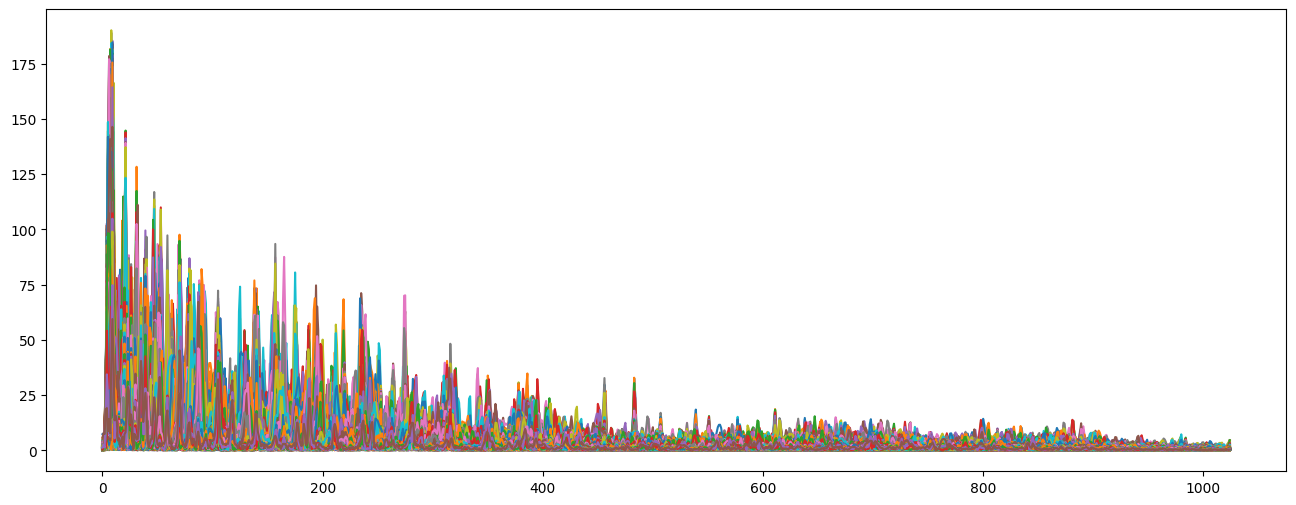

In [9]:
plt.figure(figsize=(16,6))
plt.plot(D)

Now let's jump to spectogram ! 
what is a spectogram ? It is visual representation of a spectrum of frequencies of a signal as it varies with time. 


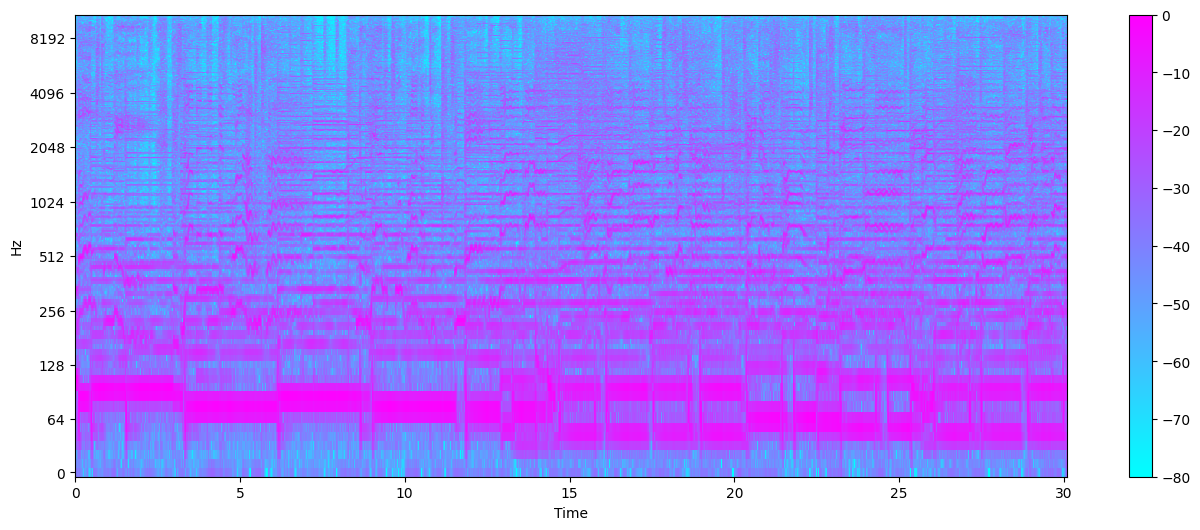

In [10]:
#converting amplitude spectogram to decibels-scaled ones
DB=librosa.amplitude_to_db(D,ref=np.max)

#creating spectogram 
plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr , hop_length=hop_length, x_axis='time', y_axis='log',cmap='cool')
#you can change the spectogram cool or warm according to your prefeerence using 'cmap' attribute 
plt.colorbar()

Mel Spectogram    

A mel spectrogram is a way to show the different pitches or tones in a sound, making it more similar to how humans hear. It's useful in tasks like recognizing speech or music, where understanding sound like we do is important.

and here y-axis is turned into Mel Scale 

In [11]:
#let's work with some other sound 
y,sr=librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y,_=librosa.effects.trim(y)

Text(0.5, 1.0, 'Metal MEL SPECTOGRAM ')

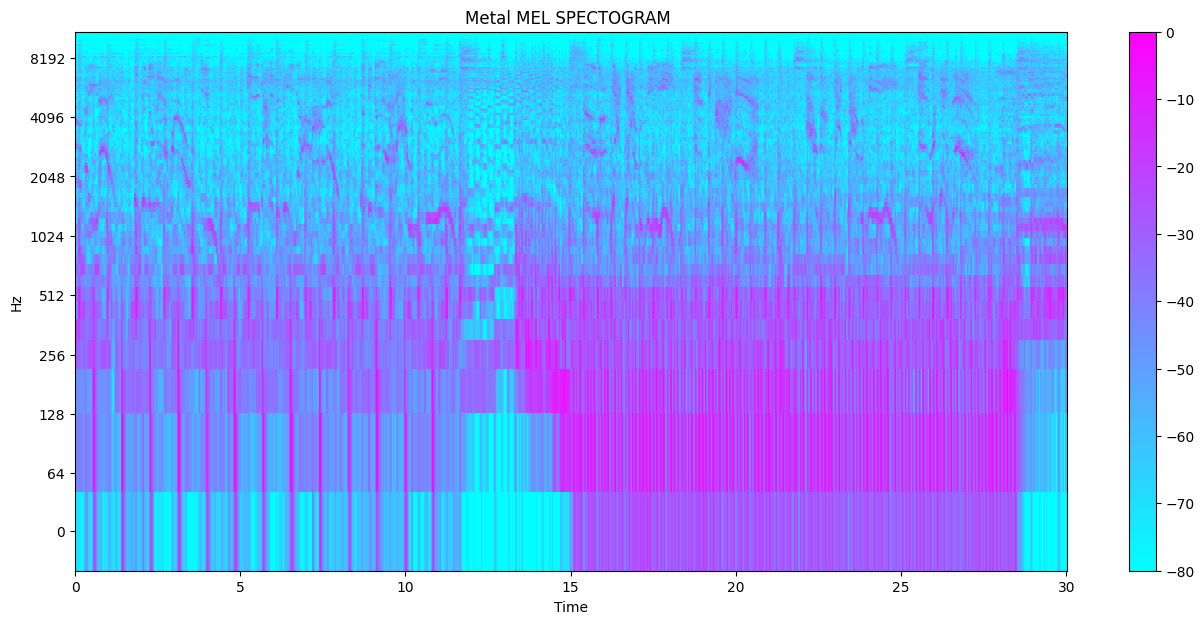

In [12]:
#Mel spectogram 
S=librosa.feature.melspectrogram(y=y,sr=sr)
S_DB=librosa.amplitude_to_db(S,ref=np.max) 
plt.figure(figsize=(16,7))
librosa.display.specshow(S_DB,sr=sr , hop_length=hop_length , x_axis='time',y_axis='log',cmap='cool')
plt.colorbar()
plt.title('Metal MEL SPECTOGRAM ')

Text(0.5, 1.0, 'Classical MEL SPECTOGRAM ')

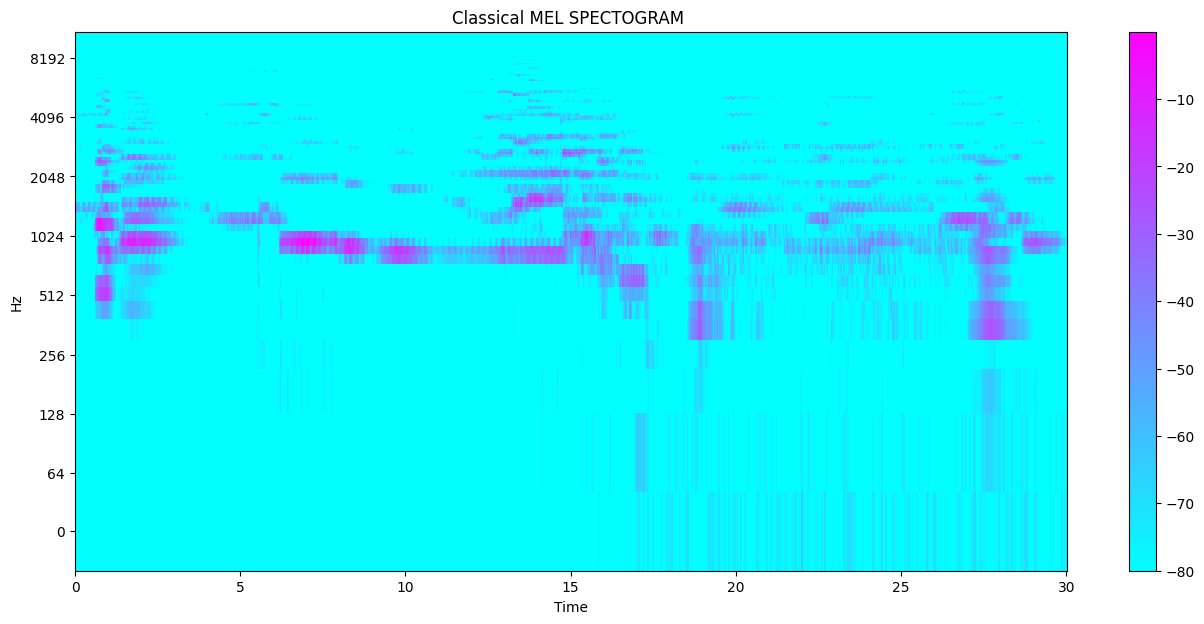

In [13]:
#now let's see iif there's any difference in classical genre's mel spectogram or not 
y,sr=librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y,_=librosa.effects.trim(y)

S=librosa.feature.melspectrogram(y=y,sr=sr)
S_DB=librosa.amplitude_to_db(S,ref=np.max) 
plt.figure(figsize=(16,7))
librosa.display.specshow(S_DB,sr=sr , hop_length=hop_length , x_axis='time',y_axis='log',cmap='cool')
plt.colorbar()
plt.title('Classical MEL SPECTOGRAM ')

NOw let's talk about different audio feature on basis of which we will be able to know different things 


First one being Zero Crossing Rate  : 
it is rate at which the signal changes from positive or negative or back. 

In [14]:
#total zero crossing of one of the song 

zero_crossing=librosa.zero_crossings(audio_file,pad=False )
print(sum(zero_crossing))

71217


Harmonics and perceptual 

as we know that human ears cannot really distinguish between many sounds that's where harmonics comes in it distinguish them for us in form of different colours 

Perceptrual is understanding shock wave represts the sound rhythm and emotion 


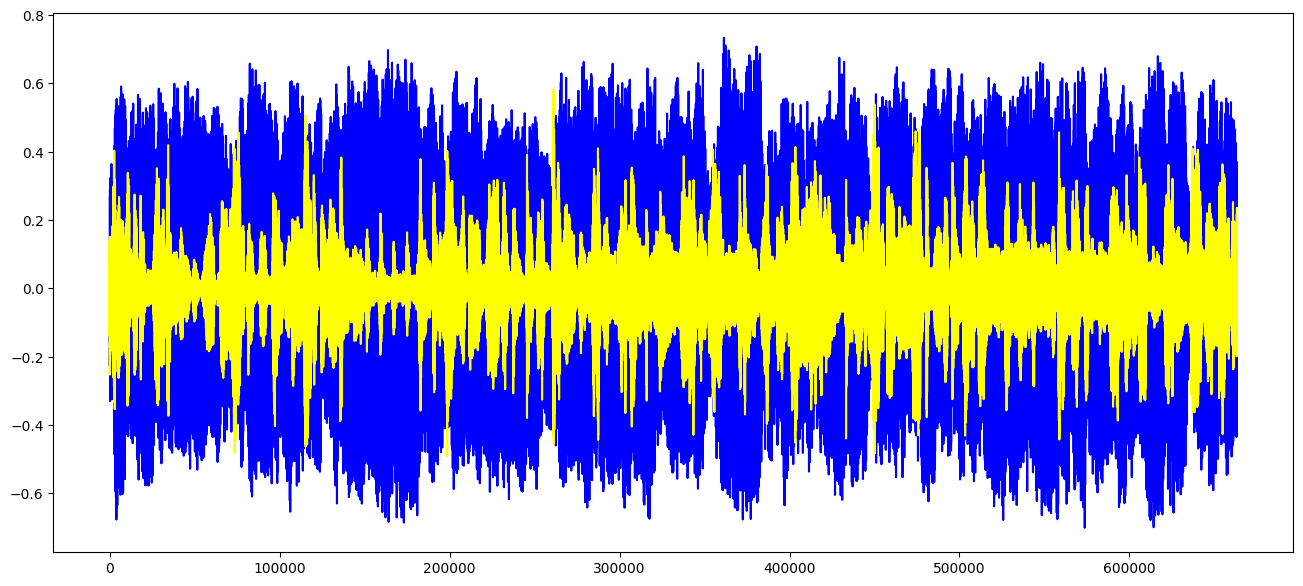

In [15]:
y_harm,y_perc=librosa.effects.hpss(audio_file)
plt.figure(figsize=(16,7))
plt.plot(y_harm,color='blue')
plt.plot(y_perc,color='yellow') 

Tempo BMO (beats per minute )

In [16]:
tempo,_=librosa.beat.beat_track(y=y,sr=sr)
tempo

107.666015625

Spectral centroid  

It indicates where "COM" for a sound is located and is calculated as the weight mean of the frequencies present in the sound 

In [17]:
#calculating spectral centroid 
spectral_centroid=librosa.feature.spectral_centroid(y=audio_file,sr=sr)[0]

#shape of variable is vector 
print(f'Centroid : {spectral_centroid}')
print(f'Shape of centroid : {spectral_centroid.shape}')
#computing the time variable for visualization 
frames=range(len(spectral_centroid))
t=librosa.frames_to_time(frames)
print(f'frames {frames} \n  t : {t}      ')

def normalize(x,axis=0):
    return sklearn.preprocessing.minmax_scale(x,axis=axis)

Centroid : [2822.96098842 2628.23792002 2399.54108711 ... 2747.95697053 2905.07022912
 2870.27979873]
Shape of centroid : (1296,)
frames range(0, 1296) 
  t : [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 3.00234014e+01
 3.00466213e+01 3.00698413e+01]      


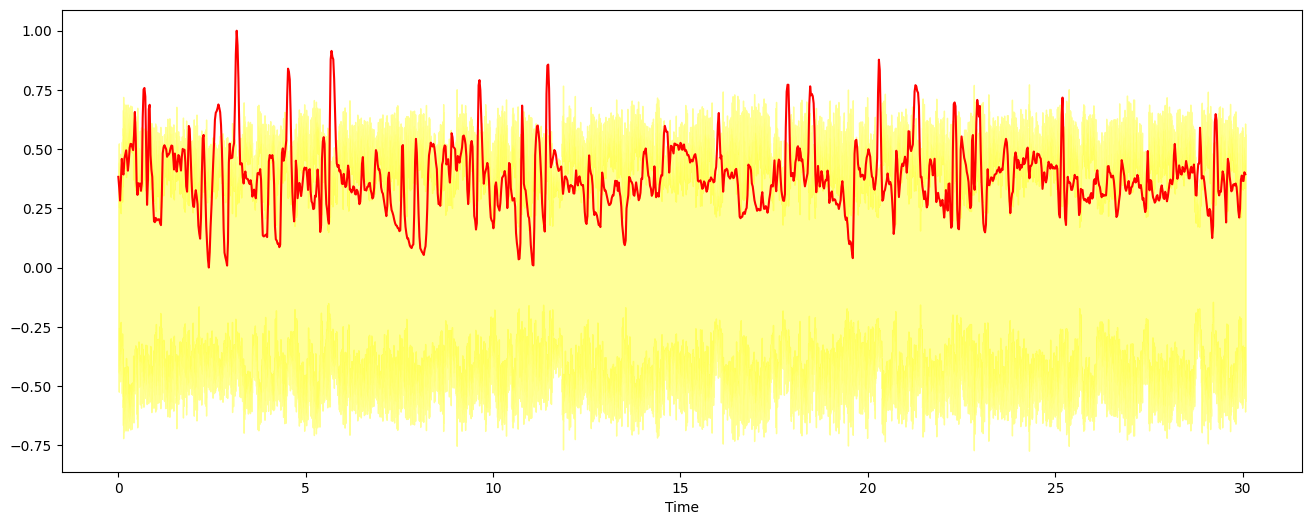

In [18]:
#plottiing spectral centroid along the wave form 

plt.figure(figsize=(16,6))

librosa.display.waveshow(audio_file,sr=sr,alpha=0.4,color='yellow')
plt.plot(t,normalize(spectral_centroid),color='red')

Spectral Rolloff 

it is measure of shape of the signal. it represents the frequency below which a specified percentage of the total spectral energy lies 

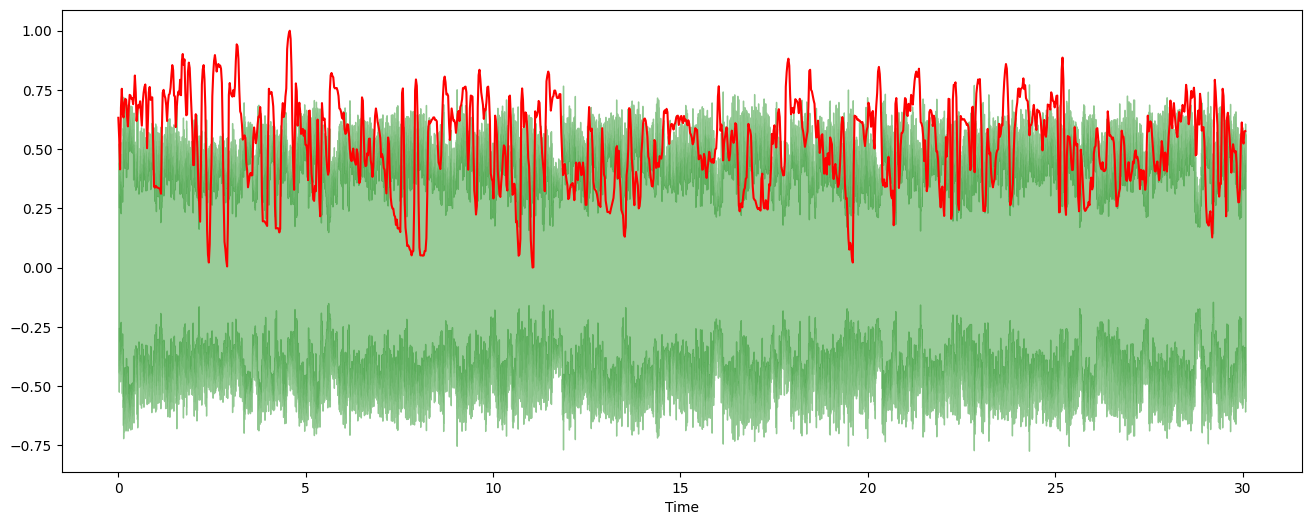

In [19]:
#vector 

spectral_rolloff=librosa.feature.spectral_rolloff(y=audio_file,sr=sr)[0]

#figure 
plt.figure(figsize=(16,6))
librosa.display.waveshow(audio_file,sr=sr,alpha=0.4,color='green')
plt.plot(t,normalize(spectral_rolloff),color='red')

MFCC  

these are the small set of features (10-20 usually) which concisely describe the overalll shape of spectral envelope. it models the characteristics of human voice 

mfcc shape : (20, 1296)


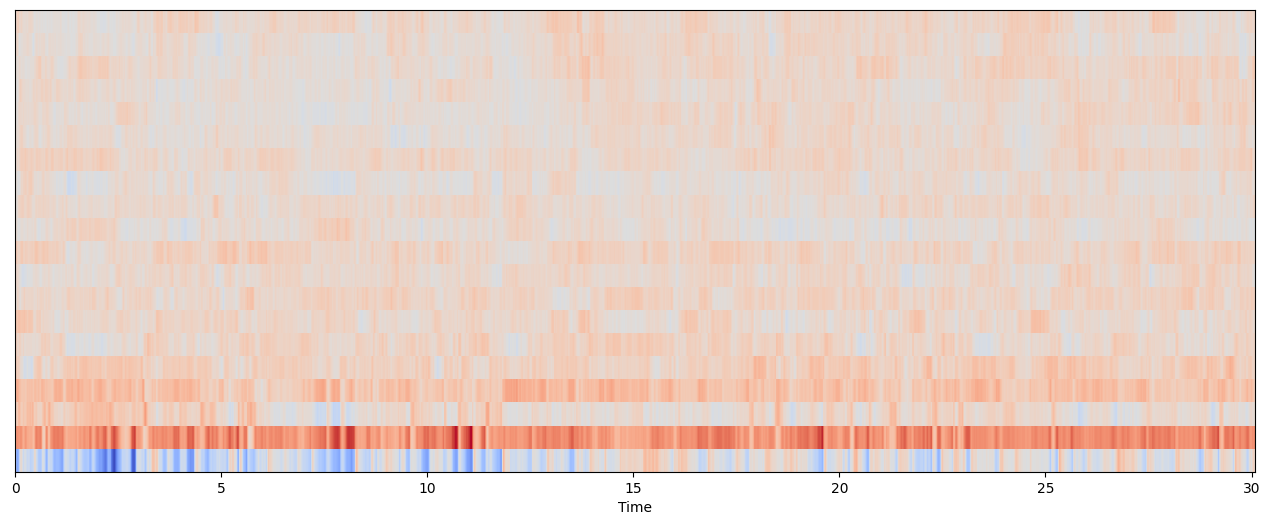

In [20]:
mfcc=librosa.feature.mfcc(y=audio_file,sr=sr )
print(f'mfcc shape : {mfcc.shape}')
plt.figure(figsize=(16,6))
librosa.display.specshow(mfcc,sr=sr,x_axis='time')

Let's get our data ready for the further analysis process 

In [21]:
#Feature scaling 
mfcc=sklearn.preprocessing.scale(mfcc,axis=1)
print(f'mean :{mfcc.mean()}')
print(f'var : {mfcc.var()}')

mean :4.1208148005011935e-09
var : 1.0


C:\Users\surti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\surti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [22]:
#as we can see that some warnings are shown in our  output 
# we can hide them or not show them using warning class's filterwarning()

import warnings 
warnings.filterwarnings('ignore')

In [23]:
#Feature scaling 
mfcc=sklearn.preprocessing.scale(mfcc,axis=1)
print(f'mean :{mfcc.mean()}')
print(f'var : {mfcc.var()}')

mean :1.1773757524480288e-09
var : 1.0


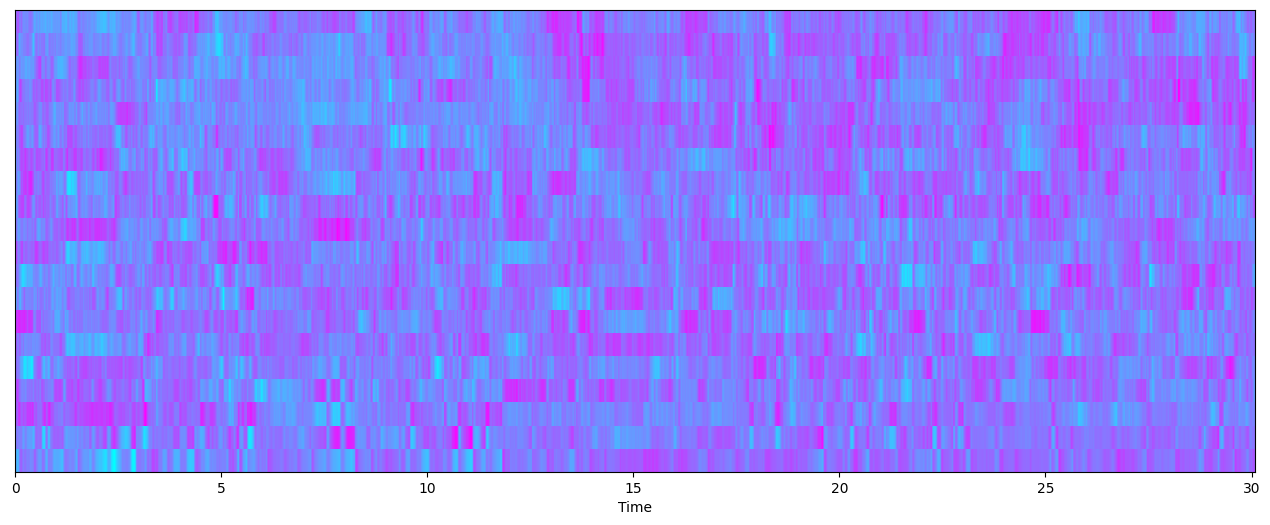

In [24]:
#plotting the scaled mfcc 

plt.figure(figsize=(16,6))
librosa.display.specshow(mfcc,sr=sr,x_axis='time',cmap='cool')

Chroma frequencies 

chroma features show the entire spectrum in 12 bin representing 12 distinct semitones of musical octave 

Chromogram Shape : (12, 133)


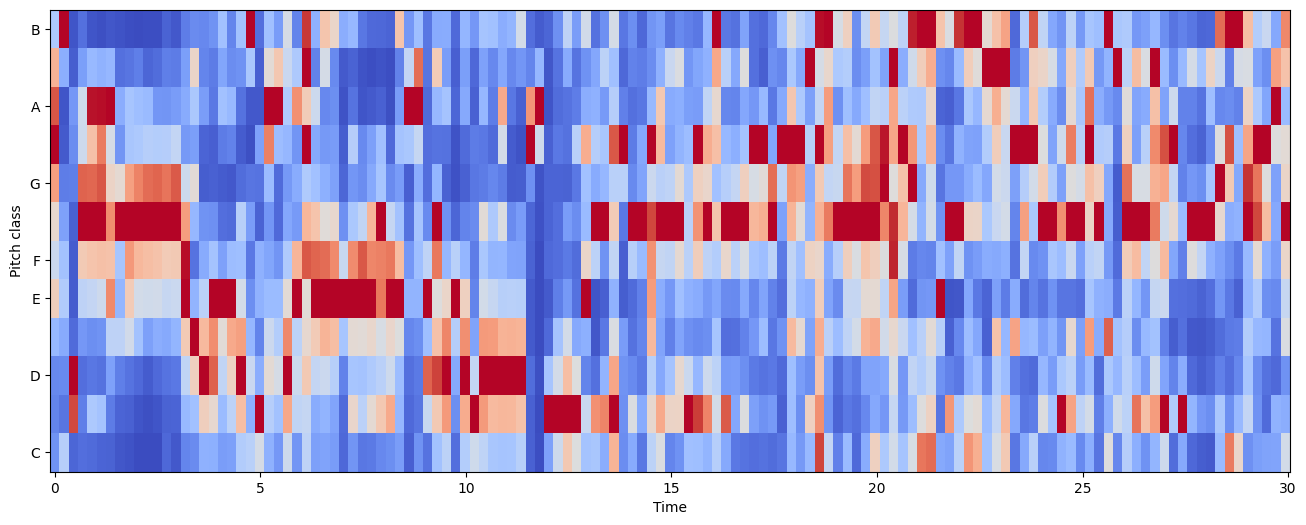

In [25]:
#Increasing the hop length to give our data more granular feature 
hop_length=5000
#chromagram 
chromagram=librosa.feature.chroma_stft(y=audio_file,sr=sr,hop_length=hop_length)
print(f'Chromogram Shape : {chromagram.shape}')

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time',y_axis='chroma',hop_length=hop_length,cmap='coolwarm')

In [26]:
#performing EDA from now  

data=pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head(10)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   
5  blues.00005.wav  661794          0.302456         0.087532  0.103494   
6  blues.00006.wav  661794          0.291328         0.093981  0.141874   
7  blues.00007.wav  661794          0.307955         0.092903  0.131822   
8  blues.00008.wav  661794          0.408879         0.086512  0.142416   
9  blues.00009.wav  661794          0.273950         0.092316  0.081314   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850           1.297741e+05   
1  0.002373             1530.176679           3.758501e+05   
2  0.002746             1552.811865           1.564676e+05   
3  0.006346             1070.106615           1.843559e+05   
4  0.002303             1835.004266           3.433999e+05   
5  0.003981             1831.993940           1.030482e+06   
6  0.008803             1459.366472           4.378594e+05   
7  0.005531             1451.667066           4.495682e+05   
8  0.001507             1719.368948           1.632828e+05   
9  0.004347             1817.150863           2.982361e+05   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   
5              1729.653287           201910.508633  ...   72.549225   
6              1389.009131           185023.239545  ...   83.248245   
7              1577.270941           168211.938804  ...   70.438438   
8              2031.740381           105542.718193  ...   50.563751   
9              1973.773306           114070.112591  ...   59.314602   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   
5    -1.838263   68.702026    -2.783800   42.447453    -3.047909   39.808784   
6   -10.913176   56.902153    -6.971336   38.231800    -3.436505   48.235741   
7   -10.568935   52.090893   -10.784515   60.461330    -4.690678   65.547516   
8    -7.041824   28.894934     2.695248   36.889568     3.412305   33.698597   
9    -1.916804   58.418438    -2.292661   83.205231     2.881967   77.082222   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  
5    -8.109991   46.311005  blues  
6    -6.483466   70.170364  blues  
7    -8.630722   56.401436  blues  
8    -2.715692   36.418430  blues  
9    -4.235203   91.468811  blues  

[10 rows x 60 columns]

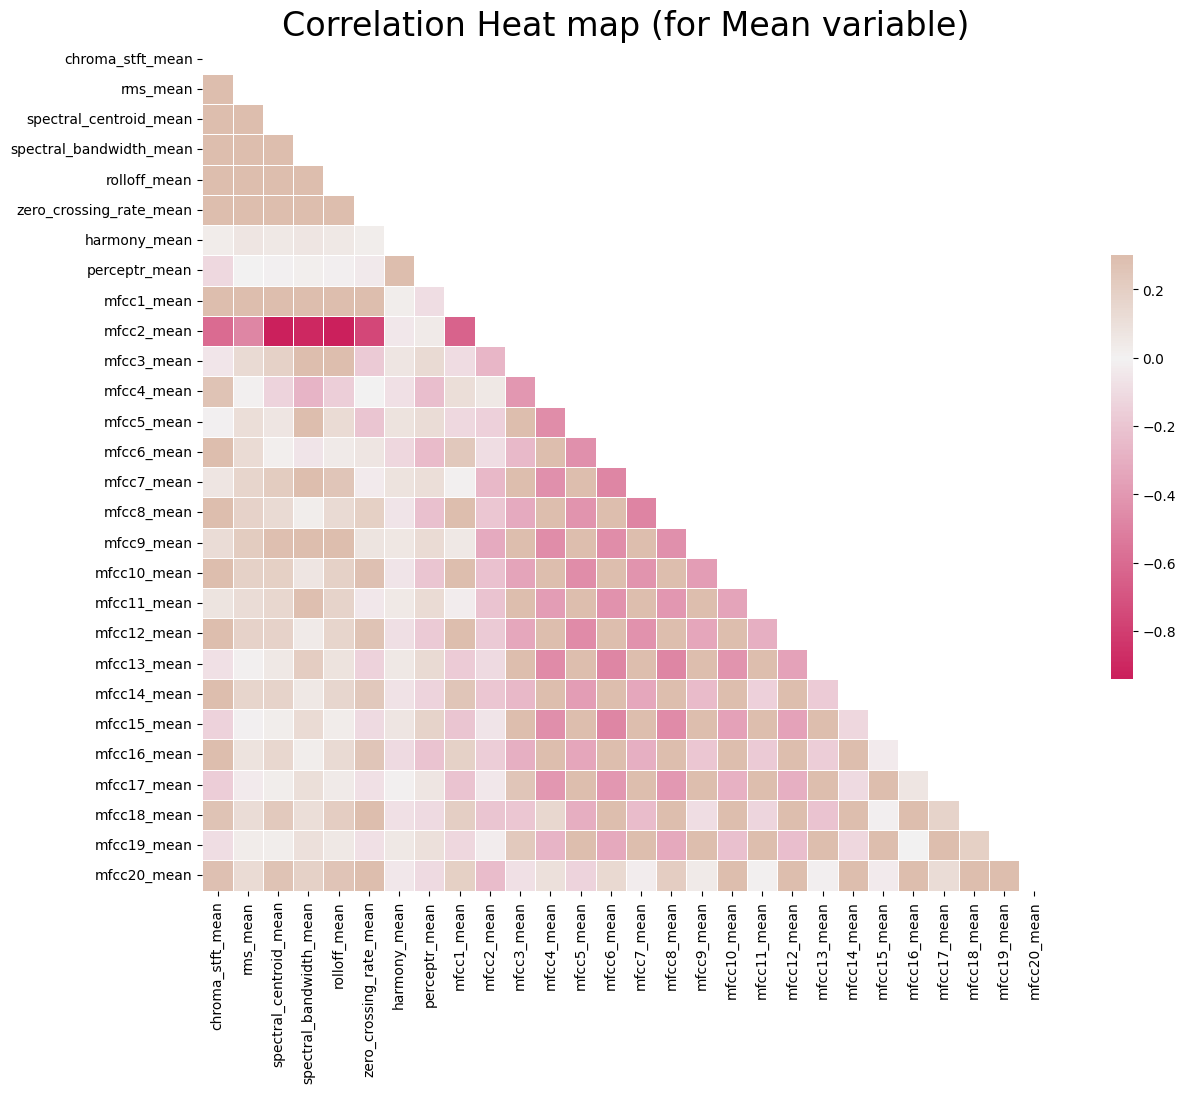

In [27]:
#Correlation Heat map for feature means 

#Correlation Matrix 
spike_cols=[col for col in data.columns if 'mean' in col ]
corr=data[spike_cols].corr() 

#generate a mask for upper triangle 
mask=np.triu(np.ones_like(corr,dtype=np.bool_))


#set up matplotlib figure 

f,ax=plt.subplots(figsize=(16,11))

#generate a color map 
cmap=sns.diverging_palette(0,25,as_cmap=True,s=90,l=45,n=5)

#Draw the heatmap with mask and correct aspect ratio 

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

plt.title('Correlation Heat map (for Mean variable)',fontsize=24)

plt.savefig("Corr Heatmap.jpg")


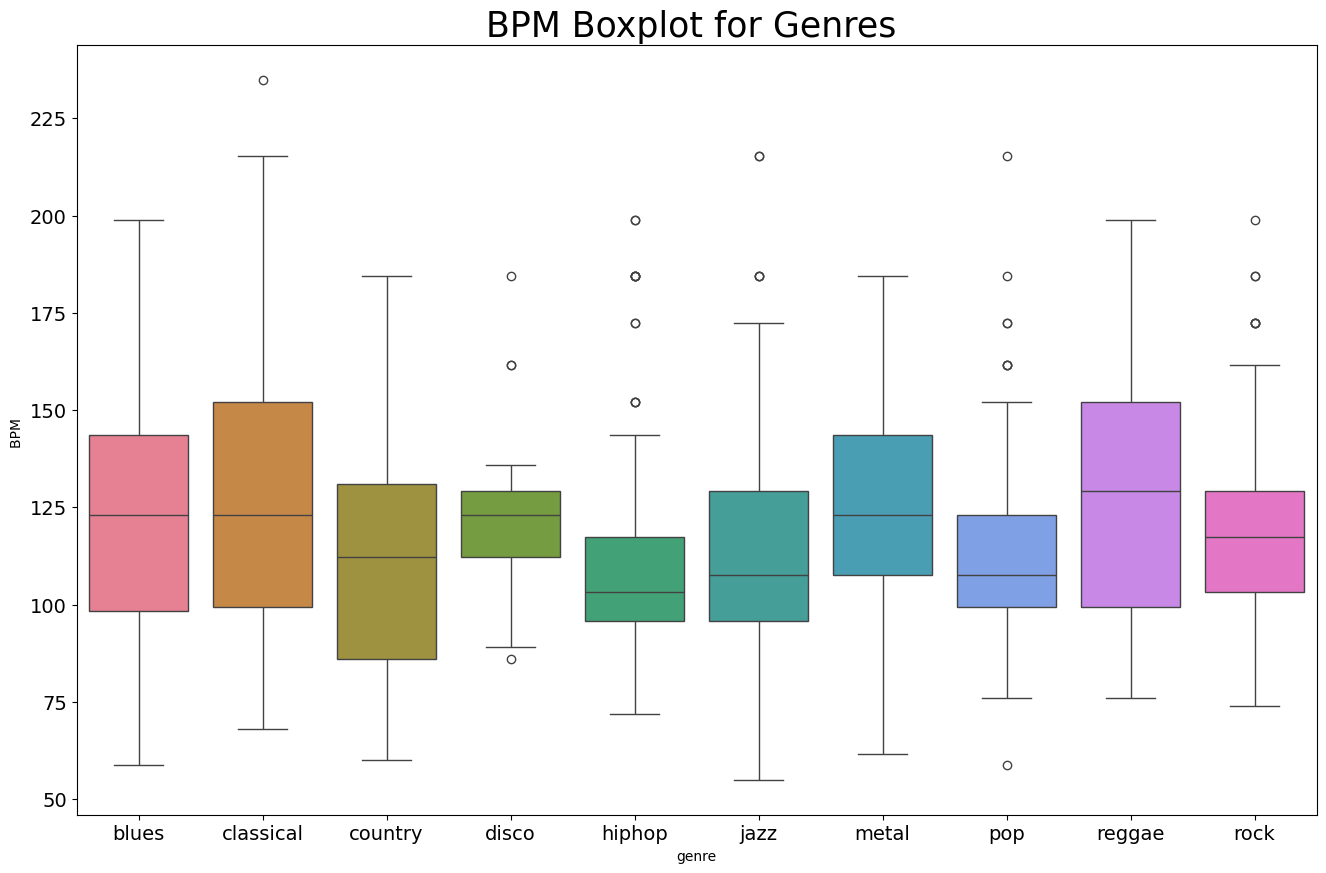

In [28]:
#Box Plot 

x=data[['label','tempo']]
f,ax=plt.subplots(figsize=(16,10))

sns.boxplot(x='label',y='tempo',data=x,palette='husl')

plt.title('BPM Boxplot for Genres ', fontsize= 25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("genre")
plt.ylabel("BPM ")

plt.savefig("BPM BoxPlot.jpg")

Principal Component Analysis - to visualize possible groups of genres
1. Normalization
2. PCA
3. The Scatter Plot

In [29]:
from sklearn import preprocessing 
data=data.iloc[0:,1:]
y=data['label']
x=data.loc[:,data.columns!='label']

### Normalize X ###
cols=x.columns
min_max_scaler=preprocessing.MinMaxScaler()
np_scaled=min_max_scaler.fit_transform(x)
x=pd.DataFrame(np_scaled,columns=cols)

###PCA 2 components ### 
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)

principalComponents=pca.fit_transform(x)
principalDF=pd.DataFrame(data=principalComponents,columns=['Principal components 1','Principal components 2'])

finalDF=pd.concat([principalDF,y],axis=1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

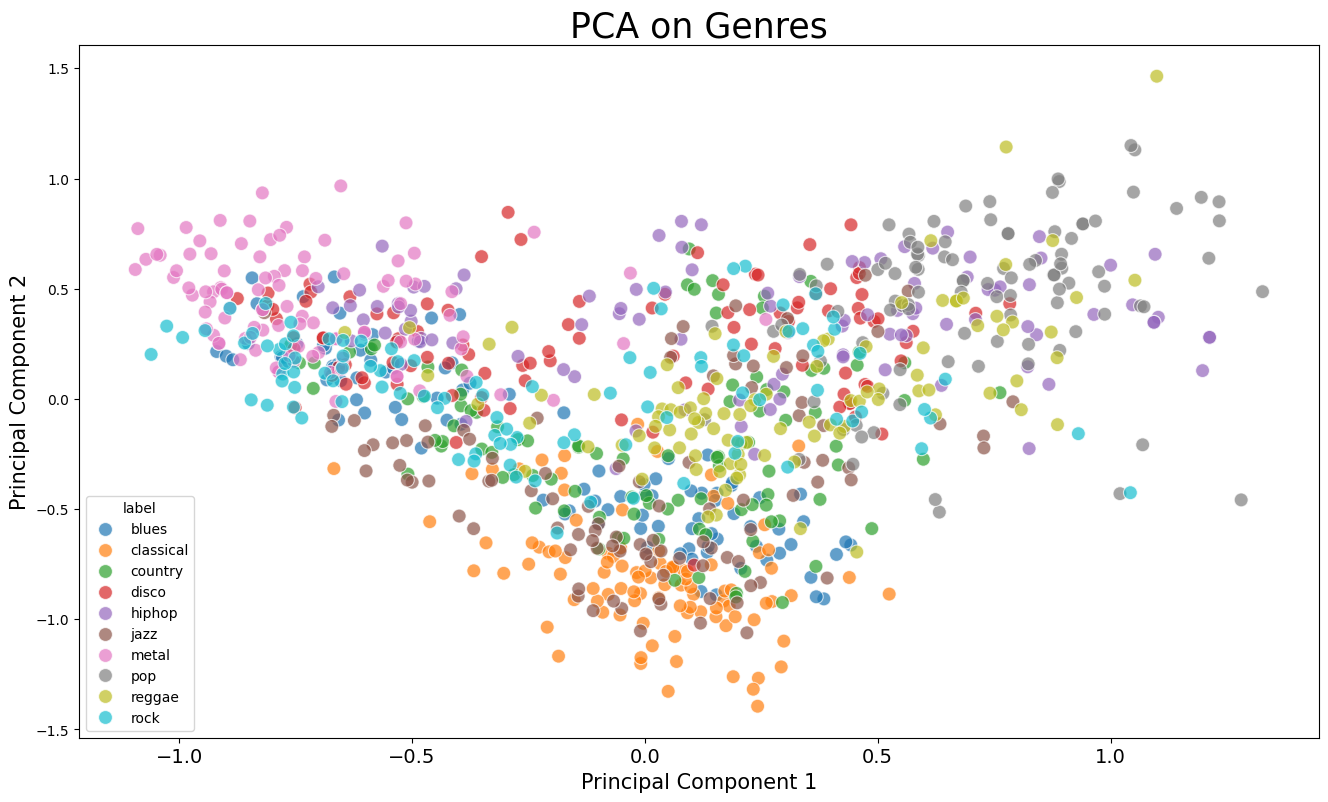

In [30]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "Principal components 1", y = "Principal components 2", data = finalDF, hue = "label", alpha = 0.7,s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")


In [31]:
finalDF.columns

Index(['Principal components 1', 'Principal components 2', 'label'], dtype='object')

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [33]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [34]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [37]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y_train)
y_encoded_test=label_encoder.fit_transform(y_test)

In [38]:
def model_assess_x(model, title = "Default"):
    model.fit(X_train, y_encoded)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_encoded_test, preds), 5), '\n')

In [39]:
#Naive bayes 
nb=GaussianNB()
model_assess(nb,"Naive bayes")


#Stochastic Gradient Descent
sgd=SGDClassifier(max_iter=5000,random_state=0)
model_assess(sgd,"SGD")

#KNN 
knn=KNeighborsClassifier(n_neighbors=19)
model_assess(knn,"KNN")

#Decision Tree 
tree=DecisionTreeClassifier()
model_assess(tree,"Decision Tree")

#Randome Forest 
rforest=RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
model_assess(rforest,"Random Forest ")

#Support vector Machine 

svm=SVC(decision_function_shape="ovo")
model_assess(svm, "svm")

#Logistic regression 
lg=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
model_assess(lg,"LogisticRegression")

#Neural nets 
nn=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5000,10),random_state=1)
model_assess(nn,"Neural net")



Accuracy Naive bayes : 0.51952 



Accuracy SGD : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Decision Tree : 0.64131 

Accuracy Random Forest  : 0.81415 

Accuracy svm : 0.75409 

Accuracy LogisticRegression : 0.6977 



KeyboardInterrupt: 

In [40]:
#Cross gradient booster 
xgb=XGBClassifier(n_estimators=1000,learning_rate=0.020)
model_assess_x(xgb,"Cross gradient ")


Accuracy Cross gradient  : 0.89289 



In [ ]:

#cross gradient booster random forest 
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess_x(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Cross Gradient Booster (Random Forest) : 0.74741 



Accuracy: 0.90657


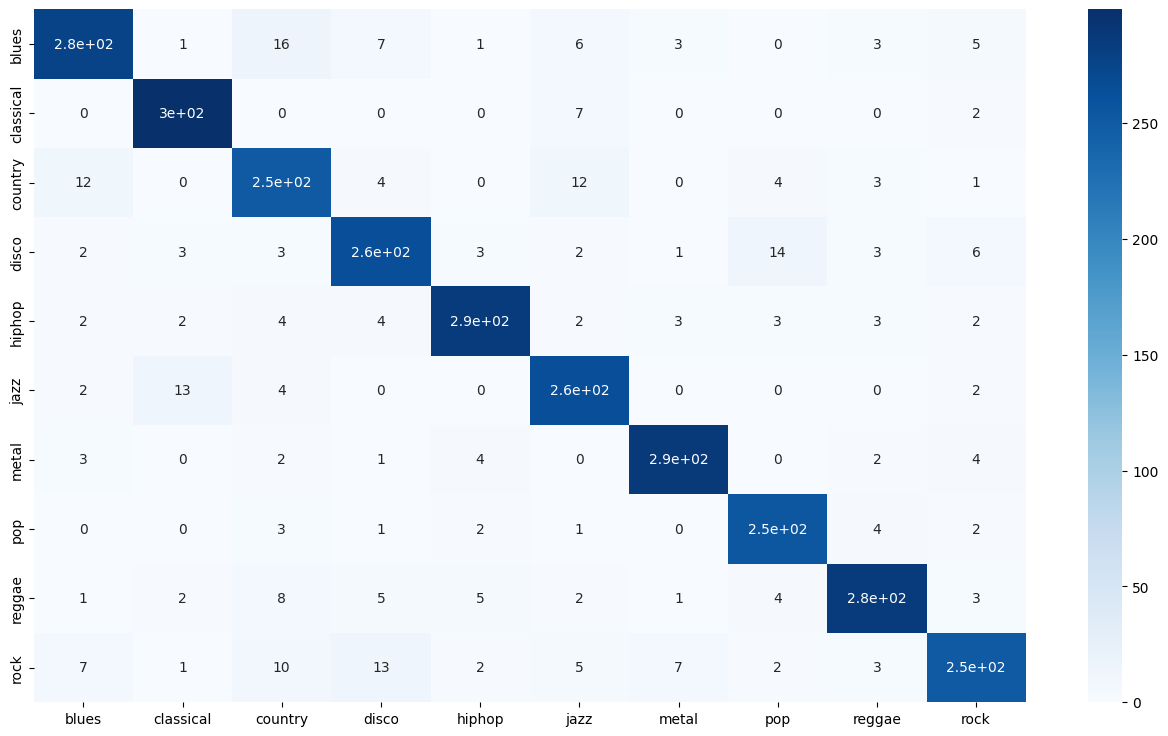

In [41]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.098)
xgb.fit(X_train, y_encoded)

# Convert string labels to numeric labels for y_test
label_mapping = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5, "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
y_test_numeric = [label_mapping[label] for label in y_test]

# Make predictions
preds = xgb.predict(X_test)

# Calculate accuracy
accuracy = round(accuracy_score(y_test_numeric, preds), 5)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, preds)

# Plot confusion matrix
plt.figure(figsize=(16, 9))
sns.heatmap(conf_matrix, cmap="Blues", annot=True,
            xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.savefig("conf_matrix.png")
plt.show()

In [43]:
# Libraries
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')

# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()

# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [44]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

In [46]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

In [47]:
find_similar_songs('pop.00019.wav') 

ipd.Audio(f'{general_path}/genres_original/pop/pop.00019.wav')


*******
Similar songs to  pop.00019.wav
filename
pop.00023.wav    0.862836
pop.00034.wav    0.860499
pop.00078.wav    0.829135
pop.00088.wav    0.824456
pop.00091.wav    0.802269
Name: pop.00019.wav, dtype: float64


In [49]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00034.wav')